In [1]:
import numpy as no
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
#iris.data

In [3]:
X = iris.data[:, :2]
#X

In [4]:
x_min, x_max, y_min, y_max = round(min(X[:, 0])), round(max(X[:, 0])), round(min(X[:, 1])), round(max(X[:, 1]))
#x_min, x_max, y_min, y_max

In [5]:
y_t = iris.target
#y

# SKLEARN

In [6]:
n_clusters = 3
random_state = 130

In [7]:
model = KMeans(n_clusters = n_clusters, random_state = random_state).fit(X)
y_pred_skl = model.predict(X)

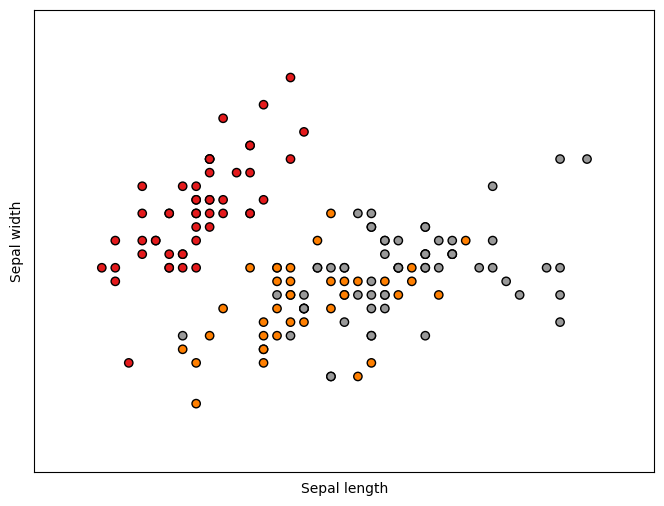

In [8]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y_t, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

# CUSTOM

In [9]:
from random import randint

from functions import dist_calc

import pandas as pd

from statistics import mean

In [10]:
k = 3
x0_min, x0_max, x1_min, x1_max = round(min(X[:, 0])), round(max(X[:, 0])), round(min(X[:, 1])), round(max(X[:, 1]))

centroids = [[randint(x0_min, x0_max), randint(x1_min, x1_max)] for c in range(k)]
centroids

centroids_list = [centroids]
#centroids_list

In [11]:
dists = [[dist_calc(P, c) for c in centroids_list[-1]] for P in X]
#dists

In [12]:
y = [d.index(min(d)) for d in dists]
#y

In [13]:
df_X = pd.DataFrame(X, columns = ['x0', 'x1'])
#df_X.head()

In [14]:
df_y = pd.DataFrame(y, columns = ['y_pred'])
#df_y.head()

In [15]:
df = pd.concat((df_X, df_y), axis = 1)
#df.head()

In [16]:
df0 = df[df['y_pred'] == 0]
#df0.head()

In [17]:
unique_y = list(dict.fromkeys(y))
unique_y.sort()
#unique_y

In [18]:
new_centroids = [[round(mean(df[df['y_pred'] == o].x0), 2), round(mean(df[df['y_pred'] == o].x1), 2)] for o in unique_y]
#new_centroids

In [19]:
centroids_list.append(new_centroids)
#centroids_list

In [20]:
# Repeat steps 3-5 until the centroids do not change position

steps = 10

centroids = [[randint(x0_min, x0_max), randint(x1_min, x1_max)] for c in range(k)]

centroids_list = [centroids]

for step in range(steps):

    # 3. Calculate the distance of all observation to each of the k centroids

    dists = [[dist_calc(P, c) for c in centroids_list[-1]] for P in X]


    # 4. Assign observations to the closest centroid

    y = [d.index(min(d)) for d in dists]      


    # 5. Find the new location of the centroid by taking the mean of all the observations in each cluster

    df_X = pd.DataFrame(X, columns = ['x0', 'x1'])
    df_y = pd.DataFrame(y, columns = ['y_pred'])

    df = pd.concat((df_X, df_y), axis = 1)

    unique_y = list(dict.fromkeys(y))
    unique_y.sort()

    new_centroids = [[round(mean(df[df['y_pred'] == o].x0), 2), round(mean(df[df['y_pred'] == o].x1), 2)] for o in unique_y]

    centroids_list.append(new_centroids)

#centroids_list

In [21]:
dfR = pd.DataFrame(centroids_list)
#dfR.head()

In [22]:
c_list = [dfR[u].to_list() for u in unique_y]
#c_list

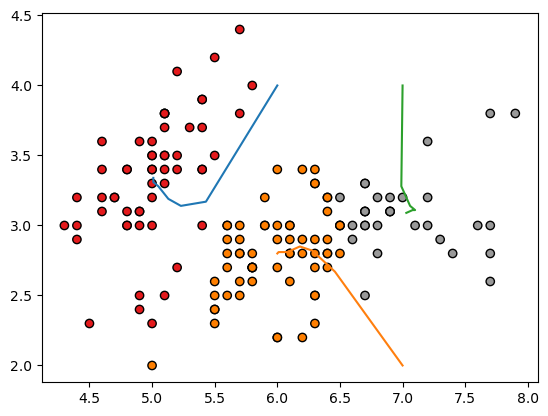

In [23]:
for i in range(len(unique_y)):
    plt.plot([c[0] for c in c_list[i]], [c[1] for c in c_list[i]])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

In [24]:
#y_pred

In [25]:
#df.y_pred.to_numpy()

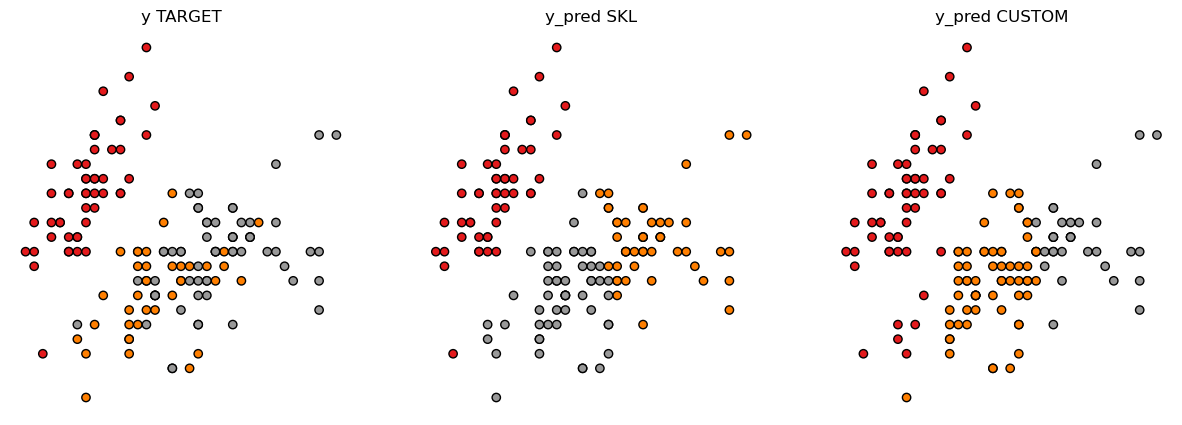

In [26]:
plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 3, 1)

plt.title('y TARGET')
plt.axis("off")

plt.scatter(X[:, 0], X[:, 1], c=y_t, cmap=plt.cm.Set1, edgecolor="k")


ax = plt.subplot(1, 3, 2)

plt.title('y_pred SKL')
plt.axis("off")

plt.scatter(X[:, 0], X[:, 1], c=y_pred_skl, cmap=plt.cm.Set1, edgecolor="k")


ax = plt.subplot(1, 3, 3)

plt.title('y_pred CUSTOM')
plt.axis("off")

plt.scatter(X[:, 0], X[:, 1], c=df.y_pred.to_numpy(), cmap=plt.cm.Set1, edgecolor="k")

In [30]:
from sklearn import metrics
clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
for metric in clustering_metrics:
  score = metric(y_t, model.labels_)
  print(f"The {metric.__name__} score is {round(score, 3)} ")

The homogeneity_score score is 0.646 
The completeness_score score is 0.647 
The v_measure_score score is 0.647 
The adjusted_rand_score score is 0.601 
The adjusted_mutual_info_score score is 0.642 


In [ ]:
for metric in clustering_metrics:
  score = metric(y_t, model.labels_)
  print(f"The {metric.__name__} score is {round(score, 3)} ")